In [1]:
import os
import pandas as pd

# Define the folder path
# folder_path = 'C:/MS_AAI/CornellMovie/' #Anand data path file
folder_path = 'C:/Users/Saad/Desktop/Saad Learnings/Python/School Python/Natural Language Processing/Project/CornellMovie/' #Saad data path file

# Initialize a dictionary to store file content
data = {}

# Loop through each file in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
            content = file.readlines()  # Read each line
        data[file_name] = content

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Load completed
# Load completed
print("Data loaded successfully!")
#print(df.head())

Data loaded successfully!


In [3]:
print("1. Basic Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n2. Data Types:")
print(df.dtypes)
print("\n3. Missing Values:")
print(df.isnull().sum())
print("\n4. Descriptive Statistics:")
display(df.describe().T)
print("\n5. Sample Data (first 5 rows):")
display(df.head())

1. Basic Information:
Number of rows: 304713
Number of columns: 6

2. Data Types:
movie_characters_metadata.txt    object
movie_conversations.txt          object
movie_lines.txt                  object
movie_titles_metadata.txt        object
raw_script_urls.txt              object
README.txt                       object
dtype: object

3. Missing Values:
movie_characters_metadata.txt    295678
movie_conversations.txt          221616
movie_lines.txt                       0
movie_titles_metadata.txt        304096
raw_script_urls.txt              304096
README.txt                       304600
dtype: int64

4. Descriptive Statistics:


,count,unique,top,freq
movie_characters_metadata.txt,9035,9035,u0 +++$+++ BIANCA +++$+++ m0 +++$+++ 10 things...,1
movie_conversations.txt,83097,83097,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L19...",1
movie_lines.txt,304713,304713,L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++...,1
movie_titles_metadata.txt,617,617,m0 +++$+++ 10 things i hate about you +++$+++ ...,1
raw_script_urls.txt,617,617,m0 +++$+++ 10 things i hate about you +++$+++ ...,1
README.txt,113,85,\n,25



5. Sample Data (first 5 rows):


,movie_characters_metadata.txt,movie_conversations.txt,movie_lines.txt,movie_titles_metadata.txt,raw_script_urls.txt,README.txt
0,u0 +++$+++ BIANCA +++$+++ m0 +++$+++ 10 things...,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L19...",L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++...,m0 +++$+++ 10 things i hate about you +++$+++ ...,m0 +++$+++ 10 things i hate about you +++$+++ ...,Cornell Movie-Dialogs Corpus\n
1,u1 +++$+++ BRUCE +++$+++ m0 +++$+++ 10 things ...,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L19...",L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON ++...,m1 +++$+++ 1492: conquest of paradise +++$+++ ...,m1 +++$+++ 1492: conquest of paradise +++$+++ ...,\n
2,u2 +++$+++ CAMERON +++$+++ m0 +++$+++ 10 thing...,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L20...",L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$...,m2 +++$+++ 15 minutes +++$+++ 2001 +++$+++ 6.1...,m2 +++$+++ 15 minutes +++$+++ http://www.daily...,Distributed together with:\n
3,u3 +++$+++ CHASTITY +++$+++ m0 +++$+++ 10 thin...,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L20...",L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++...,m3 +++$+++ 2001: a space odyssey +++$+++ 1968 ...,m3 +++$+++ 2001: a space odyssey +++$+++ http:...,\n
4,u4 +++$+++ JOEY +++$+++ m0 +++$+++ 10 things i...,"u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L20...",L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$...,m4 +++$+++ 48 hrs. +++$+++ 1982 +++$+++ 6.90 +...,m4 +++$+++ 48 hrs. +++$+++ http://www.awesomef...,"""Chameleons in imagined conversations: A new a..."


#### Cleaning the code

In [6]:
import re
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
# Focusing on Loading movie_lines.txt and movie_conversations.txt where we will parse the files
lines_file = 'C:/Users/Saad/Desktop/Saad Learnings/Python/School Python/Natural Language Processing/Project/CornellMovie/movie_lines.txt'  #Saad data path file
conversations_file = 'C:/Users/Saad/Desktop/Saad Learnings/Python/School Python/Natural Language Processing/Project/CornellMovie/movie_conversations.txt' #Saad data path file

In [10]:
def parse_lines(lines_file):# Parse movie_lines.txt to get line IDs and text
    lines = {}
    with open(lines_file, 'r', encoding='utf-8', errors='replace') as f:
        for line in f:
            parts = line.split(" +++$+++ ")
            if len(parts) == 5:
                line_id = parts[0]
                text = parts[4].strip()
                lines[line_id] = text
    return lines

In [12]:
def parse_conversations(conversations_file): # This parse movie_conversations.txt to get conversation pairs
    conversations = []
    with open(conversations_file, 'r', encoding='utf-8', errors='replace') as f:
        for line in f:
            parts = line.split(" +++$+++ ")
            if len(parts) == 4:
                line_ids = eval(parts[3])  # This is a list of line IDs
                conversations.append(line_ids)
    return conversations

In [14]:
def create_dialog_pairs(conversations, lines): # Created dialog pairs which it forms pairs of dialog lines that represent conversational exchanges between characters
    dialog_pairs = [] # 
    for conver in conversations: # Loop for the dialog pairs 
        for i in range(len(conver) - 1):
            input_line = lines.get(conver[i], "")
            target_line = lines.get(conver[i + 1], "")
            if input_line and target_line:
                dialog_pairs.append((input_line, target_line))
    return dialog_pairs

In [16]:
lines = parse_lines(lines_file) # Calling the functions 
conversations = parse_conversations(conversations_file)
dialog_pairs = create_dialog_pairs(conversations, lines) # For dialog pairs (input-response pairs)

In [18]:
cleaned_dialog_df = pd.DataFrame(dialog_pairs, columns=['input', 'response']) # Dialog pairs into DataFrame for easier manipulation

In [20]:
print(cleaned_dialog_df.head())# Display some response on a small sample of the cleaned dialog pairs 

                                               input  \
0  Can we make this quick?  Roxanne Korrine and A...   
1  Well, I thought we'd start with pronunciation,...   
2  Not the hacking and gagging and spitting part....   
3  You're asking me out.  That's so cute. What's ...   
4  No, no, it's my fault -- we didn't have a prop...   

                                            response  
0  Well, I thought we'd start with pronunciation,...  
1  Not the hacking and gagging and spitting part....  
2  Okay... then how 'bout we try out some French ...  
3                                         Forget it.  
4                                           Cameron.  


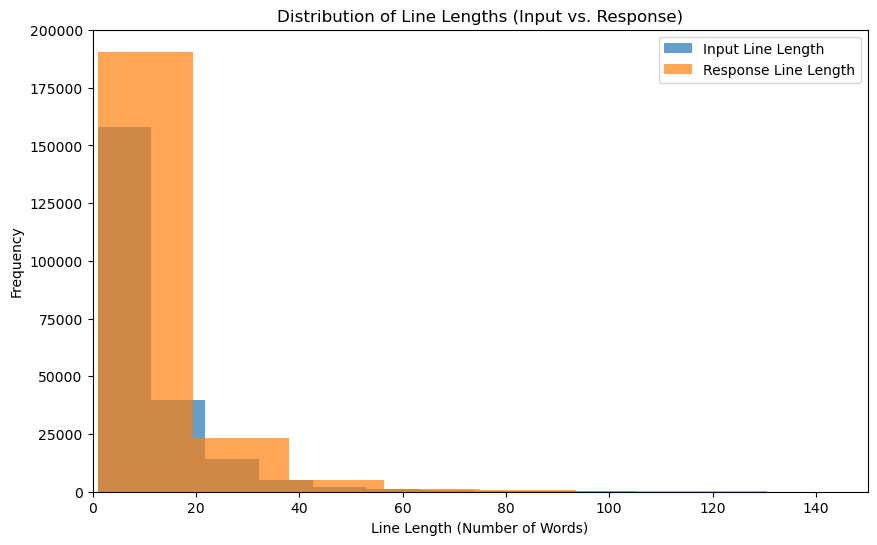

In [22]:
# Displaying Line length distribution
cleaned_dialog_df['input_length'] = cleaned_dialog_df['input'].apply(lambda x: len(x.split()))
cleaned_dialog_df['response_length'] = cleaned_dialog_df['response'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(cleaned_dialog_df['input_length'], bins=30, alpha=0.7, label='Input Line Length')
plt.hist(cleaned_dialog_df['response_length'], bins=30, alpha=0.7, label='Response Line Length')
plt.title('Distribution of Line Lengths (Input vs. Response)')
plt.xlabel('Line Length (Number of Words)')
plt.xlim(0,150)
plt.ylabel('Frequency')
plt.legend()
plt.show()

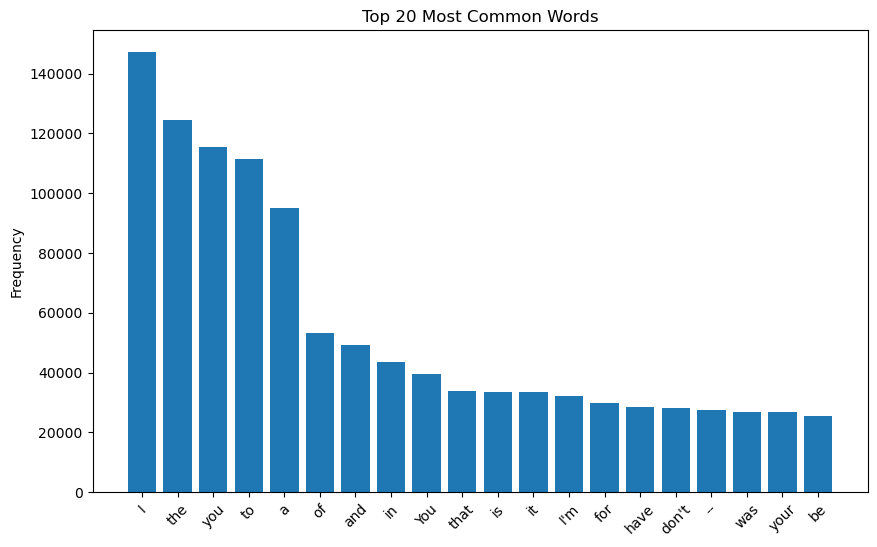

In [24]:
# For visialization of the most common words used
all_words = ' '.join(cleaned_dialog_df['input'].tolist() + cleaned_dialog_df['response'].tolist()).split()
word_counts = Counter(all_words) # Most common words in the cleaned dialog pairs

# Top 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()